<a href="https://colab.research.google.com/github/imazerty/1project/blob/master/transfer_learning_with_real_world_applications_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#shutil : offers a number of high-level operations on files and collections of files. In particular, functions are provided which support file copying and removal.
#For operations on individual files, os
import os
import numpy as np
import shutil
import glob

np.random.seed(4500)


In [0]:
!unzip "train.zip"

In [4]:
#Let’s now load up all the images in our original training data folder as follows:
files = glob.glob('train/*')
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [5]:
"""
Let’s now build our smaller dataset, so that we have 3,000 images for training,
1,000 images for validation, and 1,000 images for our test dataset
(with equal representation for the two animal categories).
"""
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)

cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [0]:
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)

In [0]:
#load up some basic dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [11]:
# Load our datasets, using the following code snippet
IMG_DIM = (150, 150)
train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
#print(train_files[0])
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)

validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)


Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


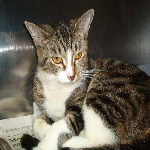

In [12]:
"""
scale each image with pixel values between (0, 255) to values between (0, 1)
because deep learning models work really well with small input values.
"""
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0]) #to see the image

In [13]:
"""
set up some basic configuration parameters and also encode our text class labels
into numeric values (otherwise, Keras will throw an error).
"""
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat'] [0 1 1 1 0 0 1 0 1 0]


In [0]:
"""
 our encoding scheme assigns the number 0 to the cat labels and 1 
 to the dog labels. We are now ready to build our first CNN-based deep
 learning model.

"""

In [15]:
#1/ Simple CNN Model from Scratch

"""
We will start by building a basic CNN model with three convolutional layers, 
coupled with max pooling for auto-extraction of features from our images
and also downsampling the output convolution feature maps.
"""
from keras.layers import  Conv2D, MaxPooling2D,Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape) )
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid' )) #sigmoid because binary classification

model.compile(
loss = 'binary_crossentropy',
optimizer = optimizers.RMSprop(),
metrics = ['accuracy']
)

model.summary()
#feature maps as output = number of filters
# number of parameters in first conv layer = (number of channels * kernel_size + 1 bias term for ech feature map) * number of kernels = (3 * 3 * 3 + 1)* 16 = 448
#number of params for pooling layer= 0
# Dense For “n” inputs and “m” outputs  “(n+1)*m” parameters.

#The flatten layer is used to flatten out 128 of the 17 x 17 feature maps that
#we get as output from the third convolution layer. This is fed to our dense 
#layers to get the final prediction of whether the image should be a dog (1) or a cat (0).

W0728 13:48:29.431108 140667324483456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 13:48:29.472001 140667324483456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 13:48:29.481289 140667324483456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 13:48:29.510090 140667324483456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0728 13:48:29.584761 140667324483456 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [0]:
"""

The batch_size indicates the total number of images passed to the model per iteration.
The weights of the units in layers are updated after each iteration.
The total number of iterations is always equal to the total number of training samples divided by the batch_size
An epoch is when the complete dataset has passed through the network once, that is, all the iterations are completed based on data batches.

"""

In [0]:
"""
We use a batch_size of 30 and our training data has a total of 3,000 samples,
which indicates that there will be a total of 100 iterations per epoch.
We train the model for a total of 30 epochs and validate it consequently 
on our validation set of 1,000 images.

"""

In [16]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data= (validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


W0728 13:58:16.449170 140667324483456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 11s 4ms/step - loss: 1.0683 - acc: 0.5210 - val_loss: 0.7593 - val_acc: 0.5020
Epoch 2/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.6493 - acc: 0.6500 - val_loss: 0.6365 - val_acc: 0.6170
Epoch 3/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.5709 - acc: 0.7060 - val_loss: 0.5434 - val_acc: 0.7450
Epoch 4/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.4788 - acc: 0.7677 - val_loss: 0.5171 - val_acc: 0.7590
Epoch 5/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.4020 - acc: 0.8233 - val_loss: 0.5428 - val_acc: 0.7730
Epoch 6/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.3100 - acc: 0.8657 - val_loss: 0.7501 - val_acc: 0.6840
Epoch 7/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2305 - acc: 0.9053 - val_loss: 0.7108 - val_acc: 0.7580
Epoch 8/30
30

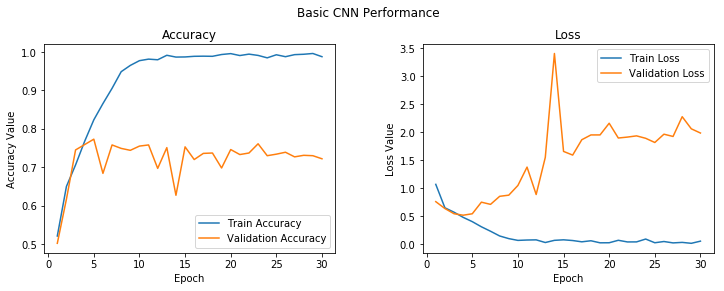

In [18]:
"""
Looks like our model is kind of overfitting, based on the training 
and validation accuracy values. We can plot our model accuracy
and errors using the following snippet to get a better perspective.

"""
#plot accuracy and loss
f, (ax1, ax2) =plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,31,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
"""
You can clearly see that after 2–3 epochs the model starts overfitting on the
training data. The average accuracy we get in our validation set is around 72%,
which is not a bad start! Can we improve upon this model?

"""

In [19]:
#2/ CNN Model with Regularization
"""
Let’s improve upon our base CNN model by adding in one more convolution layer, 
another dense hidden layer. Besides this, we will add dropout of 0.3 after each
hidden dense layer to enable regularization. Basically, dropout is a powerful 
method of regularizing in deep neural nets. It can be applied separately to both
input layers and the hidden layers. Dropout randomly masks the outputs of a 
fraction of units from a layer by setting their output to zero (in our case,
it is 30% of the units in our dense layers).


"""
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
              
              
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)     

W0728 14:12:36.619335 140667324483456 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 3s 1ms/step - loss: 0.7282 - acc: 0.5173 - val_loss: 0.6786 - val_acc: 0.6160
Epoch 2/30
3000/3000 [==============================] - 3s 913us/step - loss: 0.6815 - acc: 0.5807 - val_loss: 0.6429 - val_acc: 0.6360
Epoch 3/30
3000/3000 [==============================] - 3s 916us/step - loss: 0.6493 - acc: 0.6553 - val_loss: 0.6384 - val_acc: 0.6220
Epoch 4/30
3000/3000 [==============================] - 3s 924us/step - loss: 0.5977 - acc: 0.6920 - val_loss: 0.5697 - val_acc: 0.7100
Epoch 5/30
3000/3000 [==============================] - 3s 911us/step - loss: 0.5618 - acc: 0.7170 - val_loss: 0.5544 - val_acc: 0.7140
Epoch 6/30
3000/3000 [==============================] - 3s 917us/step - loss: 0.5137 - acc: 0.7620 - val_loss: 0.5210 - val_acc: 0.7230
Epoch 7/30
3000/3000 [==============================] - 3s 905us/step - loss: 0.4588 - acc: 0.7897 - val_loss: 0.5833 - val_acc: 0.7510
Ep

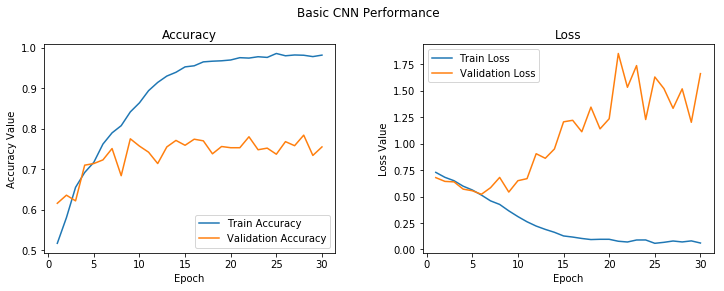

In [20]:
#plot accuracy and loss
f, (ax1, ax2) =plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,31,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
"""
You can clearly see from the preceding outputs that we still end up overfitting
the model, though it takes slightly longer and we also get a slightly better
validation accuracy of around 75%, which is decent but not amazing. 
The reason for model overfitting is because we have much less training data 
and the model keeps seeing the same instances over time across each epoch.
A way to combat this would be to leverage an image augmentation strategy to
augment our existing training data with images that are slight variations of
the existing images. We will cover this in detail in the following section.
Let’s save this model for the time being so we can use it later to evaluate 
its performance on the test data.

"""
model.save('cats_dogs_basic_cnn.h5')

In [0]:
#3/ CNN Model with Image Augmentation

"""
The idea behind image augmentation is that we follow a set process of taking
in existing images from our training dataset and applying some image 
transformation operations to them, such as rotation, shearing, translation,
zooming, and so on, to produce new, altered versions of existing images.
Due to these random transformations, we don’t get the same images each time,
and we will leverage Python generators to feed in these new images to our model
during training.
"""

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']
(1, 150, 150, 3)


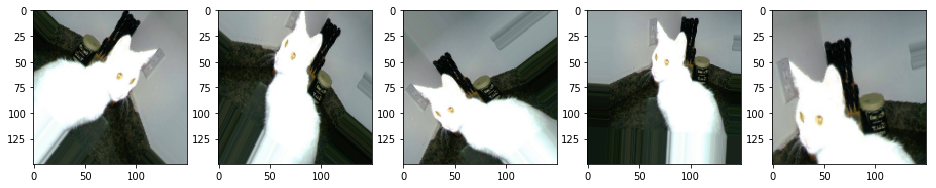

In [35]:
img_id = 1000
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator)  for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]
print(cat[0][0].shape)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


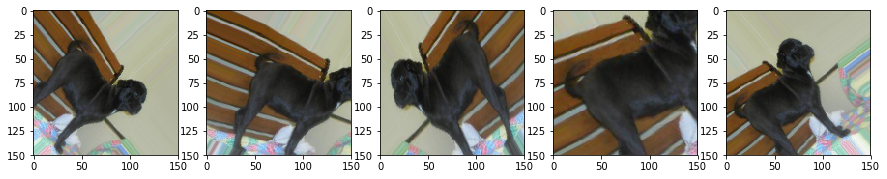

In [38]:
img_id = 12
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [0]:
"""
Remember for our validation generator, we just need to send the validation
images (original ones) to the model for evaluation; hence, we just scale the
image pixels (between 0–1) and do not apply any transformations.

"""

In [42]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 
#remember : steps_per_epoch = 3000 / 30, number training images/ batch_size
#validation_steps = 1000/20
              

Epoch 1/100
100/100 [==============================] - 14s 144ms/step - loss: 0.6967 - acc: 0.4973 - val_loss: 0.6882 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 14s 138ms/step - loss: 0.6898 - acc: 0.5440 - val_loss: 0.6727 - val_acc: 0.5920
Epoch 3/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6776 - acc: 0.5757 - val_loss: 0.6502 - val_acc: 0.6300
Epoch 4/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6601 - acc: 0.6010 - val_loss: 0.6923 - val_acc: 0.5630
Epoch 5/100
100/100 [==============================] - 14s 138ms/step - loss: 0.6574 - acc: 0.6080 - val_loss: 0.6411 - val_acc: 0.6320
Epoch 6/100
100/100 [==============================] - 14s 141ms/step - loss: 0.6545 - acc: 0.6160 - val_loss: 0.7311 - val_acc: 0.5570
Epoch 7/100
100/100 [==============================] - 14s 139ms/step - loss: 0.6413 - acc: 0.6267 - val_loss: 0.6350 - val_acc: 0.6210
Epoch 8/100
100/100 [===========================

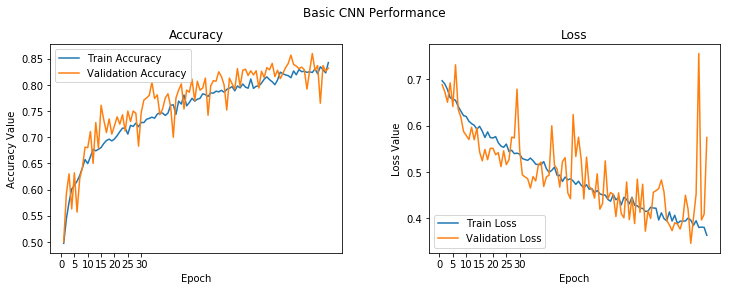

In [46]:
#plot accuracy and loss
f, (ax1, ax2) =plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,31,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
"""
While there are some spikes in the validation accuracy and loss, overall,
we see that it is much closer to the training accuracy, with the loss indicating
that we obtained a model that generalizes much better as compared to our
previous models. Let’s save this model now so we can evaluate it later on our
test dataset.
"""

In [0]:
model.save('cats_dogs_cnn_img_aug.h5')

In [48]:
# 3/ Leveraging Transfer Learning with Pre-trained CNN Models

"""
we have a total of 13 convolution layers using 3 x 3 convolution filters
along with max pooling layers for downsampling and a total of two fully
connected hidden layers of 4096 units in each layer followed by a dense 
layer of 1000 units, where each unit represents one of the image categories
in the ImageNet database. We do not need the last three layers since we will
be using our own fully connected dense layers to predict whether images will
be a dog or a cat. We are more concerned with the first five blocks, so that
we can leverage the VGG model as an effective feature extractor.

"""

#a) Pre-trained CNN model as a Feature Extractor
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top = False, weights = 'imagenet', input_shape = input_shape)
output = vgg.layers[-1].output
print(output)
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

#visualizing the layers characteristics
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

Tensor("block5_pool_1/MaxPool:0", shape=(?, 4, 4, 512), dtype=float32)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fee51ee9748>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7fee51ee9c18>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fee52d574e0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fee51e2bba8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fee51e2b780>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fee51e5bcc0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fee51df3fd0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fee51df3780>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fee51d9dac8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fee51db2940>,block3_conv3,False


(1, 4, 4, 512)


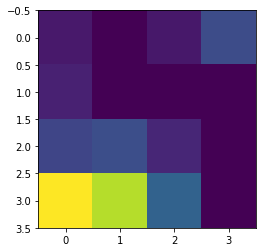

In [50]:
"""
The last activation feature map in the VGG-16 model (output from block5_pool)
gives us the bottleneck features which can then be flattened and fed to a fully 
connected deep neural network classifier. The following snippet shows what 
the bottleneck features look like for a sample image from our training data.
"""

bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [52]:
"""
A way to save time in model training is to use this model and extract
out all the features from our training and validation datasets and 
then feed them as inputs to our classifier. Let’s extract out the
bottleneck features from our training and validation sets now.


"""
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [55]:
"""
Let’s build the architecture of our deep neural network classifier now, which will take these features as input

"""
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]
#print(vgg_model.output_shape)
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 500us/step - loss: 0.4410 - acc: 0.7877 - val_loss: 0.2989 - val_acc: 0.8750
Epoch 2/30
3000/3000 [==============================] - 1s 224us/step - loss: 0.2988 - acc: 0.8667 - val_loss: 0.2543 - val_acc: 0.8980
Epoch 3/30
3000/3000 [==============================] - 1s 221us/step - loss: 0.2465 - acc: 0.8993 - val_loss: 0.2711 - val_acc: 0.8890
Epoch 4/30
3000/3000 [==============================] - 1s 217us/step - loss: 0.2019 - acc: 0.9203 - val_loss: 0.2560 - val_acc: 0.8980
Epoch 5/30
3000/3000 [==============================] - 1s 215us/step - loss: 0.1820 - acc: 0.9223 - val_loss: 0.2632 - val_acc: 0.8960
Epoch 6/30
3000/3000 [==============================] - 1s 218us/step - loss: 0.1488 - acc: 0.9413 - val_loss: 0.2868 - val_acc: 0.8950
Epoch 7/30
3000/3000 [==============================] - 1s 219us/step - loss: 0.1247 - acc: 0.9533 - val_loss: 0.3012 - val_acc: 0.8780


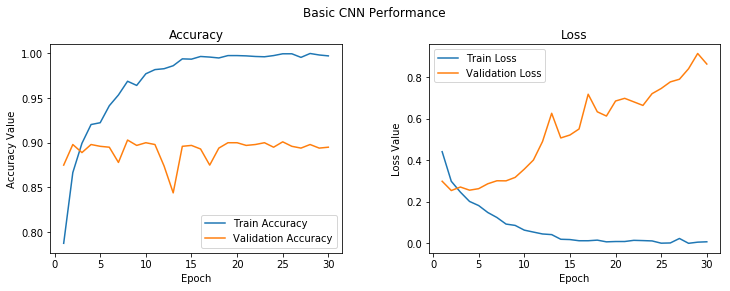

In [59]:
#plot accuracy and loss
f, (ax1, ax2) =plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,31,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
"""
We get a model with a validation accuracy of close to 88%, almost a
5–6% improvement from our basic CNN model with image augmentation,
which is excellent. The model does seem to be overfitting though.
There is a decent gap between the model train and validation accuracy
after the fifth epoch, which kind of makes it clear that the model is
overfitting on the training data after that. But overall, this seems 
to be the best model so far. Let’s try using our image augmentation 
strategy on this model. Before that, we save this model to disk using
the following code.

"""
model.save('cats_dogs_tlearn_basic_cnn.h5')

In [0]:
#b/ Pre-trained CNN model as a Feature Extractor with Image Augmentation

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [61]:
"""
We won’t extract the bottleneck features like last time since we will be
training on data generators; hence, we will be passing the vgg_model object
as an input to our own model.

"""

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)   

Epoch 1/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6581 - acc: 0.6017 - val_loss: 0.4717 - val_acc: 0.8320
Epoch 2/100
100/100 [==============================] - 17s 168ms/step - loss: 0.5638 - acc: 0.7077 - val_loss: 0.3995 - val_acc: 0.8410
Epoch 3/100
100/100 [==============================] - 17s 167ms/step - loss: 0.4952 - acc: 0.7580 - val_loss: 0.3379 - val_acc: 0.8550
Epoch 4/100
100/100 [==============================] - 17s 166ms/step - loss: 0.4833 - acc: 0.7683 - val_loss: 0.3199 - val_acc: 0.8620
Epoch 5/100
100/100 [==============================] - 17s 167ms/step - loss: 0.4556 - acc: 0.7810 - val_loss: 0.3014 - val_acc: 0.8660
Epoch 6/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4361 - acc: 0.7980 - val_loss: 0.2903 - val_acc: 0.8740
Epoch 7/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4252 - acc: 0.8053 - val_loss: 0.2857 - val_acc: 0.8750
Epoch 8/100
100/100 [===========================

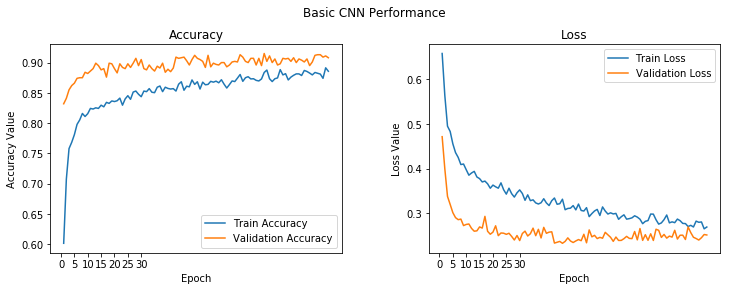

In [62]:
#plot accuracy and loss
f, (ax1, ax2) =plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,31,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
"""
We can see that our model has an overall validation accuracy of 90%, 
which is a slight improvement from our previous model, and also the
train and validation accuracy are quite close to each other, indicating
that the model is not overfitting. Let’s save this model on the disk now 
for future evaluation on the test data.

"""
model.save('cats_dogs_tlearn_img_aug_cnn.h5')

In [64]:
#c/ Pre-trained CNN model with Fine-tuning and Image Augmentation

"""
unfreeze convolution blocks 4 and 5 while keeping the first three blocks frozen. 

"""

vgg_model.trainable = False
set_trainable = False

for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
    
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])     


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fee51ee9748>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7fee51ee9c18>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fee52d574e0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fee51e2bba8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fee51e2b780>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fee51e5bcc0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fee51df3fd0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fee51df3780>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fee51d9dac8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fee51db2940>,block3_conv3,False


In [65]:
"""
the convolution and pooling layers pertaining to blocks 4 and 5 are now
trainable. This means the weights for these layers will also get updated 
with backpropagation in each epoch as we pass each batch of data. We will
use the same data generators and model architecture as our previous model
and train our model. We reduce the learning rate slightly, since we don’t
want to get stuck at any local minimal, and we also do not want to suddenly
update the weights of the trainable VGG-16 model layers by a big factor that
might adversely affect the model.

"""
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)              


Epoch 1/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6895 - acc: 0.5730 - val_loss: 0.5862 - val_acc: 0.7790
Epoch 2/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6273 - acc: 0.6453 - val_loss: 0.5052 - val_acc: 0.8120
Epoch 3/100
100/100 [==============================] - 17s 170ms/step - loss: 0.5906 - acc: 0.6800 - val_loss: 0.4485 - val_acc: 0.8250
Epoch 4/100
100/100 [==============================] - 17s 170ms/step - loss: 0.5474 - acc: 0.7263 - val_loss: 0.4046 - val_acc: 0.8400
Epoch 5/100
100/100 [==============================] - 17s 171ms/step - loss: 0.5282 - acc: 0.7343 - val_loss: 0.3767 - val_acc: 0.8450
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.4971 - acc: 0.7667 - val_loss: 0.3525 - val_acc: 0.8530
Epoch 7/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4913 - acc: 0.7723 - val_loss: 0.3366 - val_acc: 0.8650
Epoch 8/100
100/100 [===========================

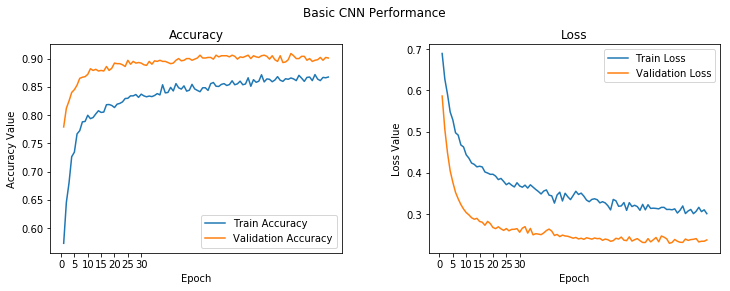

In [66]:
#plot accuracy and loss
f, (ax1, ax2) =plt.subplots(1, 2, figsize = (12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,31,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
"""
We can see from the preceding output that our model has obtained a validation 
accuracy of around 96%, which is a 6% improvement from our previous model. 
Overall, this model has gained a 24% improvement in validation accuracy from
our first basic CNN model. This really shows how useful transfer learning 
can be. We can see that accuracy values are really excellent here,
and although the model looks like it might be slightly overfitting on the 
training data, we still get great validation accuracy. Let’s save this model
to disk now using the following code.



"""
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

In [68]:
# Evaluating our Deep Learning Models on Test Data

# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
basic_cnn = load_model('cats_dogs_basic_cnn.h5')
img_aug_cnn = load_model('cats_dogs_cnn_img_aug.h5')
tl_cnn = load_model('cats_dogs_tlearn_basic_cnn.h5')
tl_img_aug_cnn = load_model('cats_dogs_tlearn_img_aug_cnn.h5')
tl_img_aug_finetune_cnn = load_model('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [69]:
"""
 Let’s load up and prepare our test dataset first before we try making predictions
"""
test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])


Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'dog', 'cat', 'cat'] [0, 0, 1, 0, 0]


In [70]:
#Model 1: Basic CNN Performance

predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.717
Precision: 0.7259
Recall: 0.717
F1 Score: 0.7142

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.77      0.62      0.69       500
         cat       0.68      0.82      0.74       500

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.71      1000
weighted avg       0.73      0.72      0.71      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  309        191
        cat  92         408


/content/model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/model_evaluation_utils.py:65: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [71]:
#Model 2: Basic CNN with Image Augmentation Performance
predictions = img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.797
Precision: 0.805
Recall: 0.797
F1 Score: 0.7957

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.85      0.72      0.78       500
         cat       0.76      0.88      0.81       500

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  358        142
        cat  61         439


/content/model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/model_evaluation_utils.py:65: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [72]:
#Model 3: Transfer Learning — Pre-trained CNN as a Feature Extractor Performance
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.888
Precision: 0.8882
Recall: 0.888
F1 Score: 0.888

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.90      0.88      0.89       500
         cat       0.88      0.90      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  439        61 
        cat  51         449


/content/model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/model_evaluation_utils.py:65: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [73]:
#Model 4: Transfer Learning — Pre-trained CNN as a Feature Extractor with Image Augmentation Performance
predictions = tl_img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.9
Precision: 0.9005
Recall: 0.9
F1 Score: 0.9

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.89      0.92      0.90       500
         cat       0.91      0.88      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  459        41 
        cat  59         441


/content/model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/model_evaluation_utils.py:65: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [74]:
#Model 5: Transfer Learning — Pre-trained CNN with Fine-tuning and Image Augmentation Performance
predictions = tl_img_aug_finetune_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.908
Precision: 0.9081
Recall: 0.908
F1 Score: 0.908

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         dog       0.90      0.92      0.91       500
         cat       0.91      0.90      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   dog  cat
Actual: dog  458        42 
        cat  50         450


/content/model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/model_evaluation_utils.py:65: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


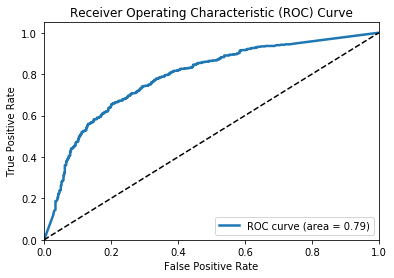

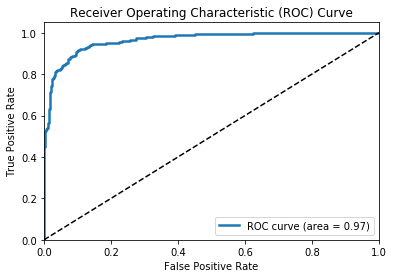

In [75]:
"""
Each subsequent model performs better than the previous model, which is expected,
since we tried more advanced techniques with each new model.
Our worst model is our basic CNN model, with a model accuracy
and F1-score of around 78%, and our best model is our fine-tuned
model with transfer learning and image augmentation, which gives us
a model accuracy and F1-score of 96%, which is really amazing considering
we trained our model from our 3,000 image training dataset. Let’s plot the
ROC curves of our worst and best models now.


"""


# worst model - basic CNN 
meu.plot_model_roc_curve(basic_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1]) 

# best model - transfer learning with fine-tuning & image augmentation 
meu.plot_model_roc_curve(tl_img_aug_finetune_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])

In [0]:
"""
This should give you a good idea of how much of a difference pre-trained models
and transfer learning can make, especially in tackling complex problems when we
have constraints like less data. We encourage you to try out similar strategies
with your own data!

"""

""" the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test (Zweig & Campbell, 1993)."""